<a href="https://colab.research.google.com/github/Liamloope/Miniprojeto/blob/main/Mini_Projeto_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
### Importando bibliotecas ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr

In [60]:
### Download dos arquivos a partir do repositório do Github ###

birth_download = "https://raw.githubusercontent.com/Liamloope/Miniprojeto/refs/heads/main/crude_birth_rate_births_per_1000_population.csv"
urban_download = "https://raw.githubusercontent.com/Liamloope/Miniprojeto/refs/heads/main/urban_population_percent_of_total.csv"


Hipótese 1: Em 1985 os dois gráficos vão se encontrar no mesmo ponto do gráfico.

Hipótese 2: De 1960 à 2010 o crescimento da populão urbana é inversamente propocional ao da taxa de natalidade

In [61]:
### Lendo os arquivos do repositório a partir do repositório ###

birth_rate = pd.read_csv(birth_download)
urban_growth = pd.read_csv(urban_download)

In [62]:
### Limitando para que somente seja lido os dados do Brasil ###

brasil_birth_rate = birth_rate[birth_rate["country"] == "Brazil"]
brasil_urban_growth = urban_growth[urban_growth["country"] == "Brazil"]

In [63]:
### Função para preparar dados de um indicador ###
def preparar_df(df, valor_col):
    df_br = df[df['country'] == 'Brazil']                       ### filtra Brasil ###
    df_long = df_br.melt(id_vars='country', var_name='year', value_name=valor_col)
    df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
    df_long[valor_col] = pd.to_numeric(df_long[valor_col], errors='coerce')
    return df_long[['year', valor_col]]

### Preparar DataFrames ###
br_birth = preparar_df(birth_rate, 'birth_rate')
br_urban = preparar_df(urban_growth, 'urban_growth')

### Combinar indicadores ###
df_merge = pd.merge(br_birth, br_urban, on='year', how='inner')

### Faixa de anos para análise ###
df_1960_2010 = df_merge[(df_merge['year'] >= 1960) & (df_merge['year'] <= 2010)]

### Ano específico ###
ano_ref = 1985
dados_1985 = df_merge[df_merge['year'] == ano_ref]


In [64]:
### Estatística descritiva ####
for col in ['birth_rate', 'urban_growth']:
    dados = df_1960_2010[col]
    print(f"\nEstatísticas para {col} (1960-2010):")
    print(f"Média: {dados.mean():.2f}")
    print(f"Mediana: {dados.median():.2f}")
    print(f"Desvio padrão: {dados.std():.2f}")
    print(f"Mínimo: {dados.min():.2f}")
    print(f"Máximo: {dados.max():.2f}")


Estatísticas para birth_rate (1960-2010):
Média: 28.42
Mediana: 28.80
Desvio padrão: 8.13
Mínimo: 15.60
Máximo: 43.10

Estatísticas para urban_growth (1960-2010):
Média: 68.33
Mediana: 69.90
Desvio padrão: 11.99
Mínimo: 46.10
Máximo: 84.30


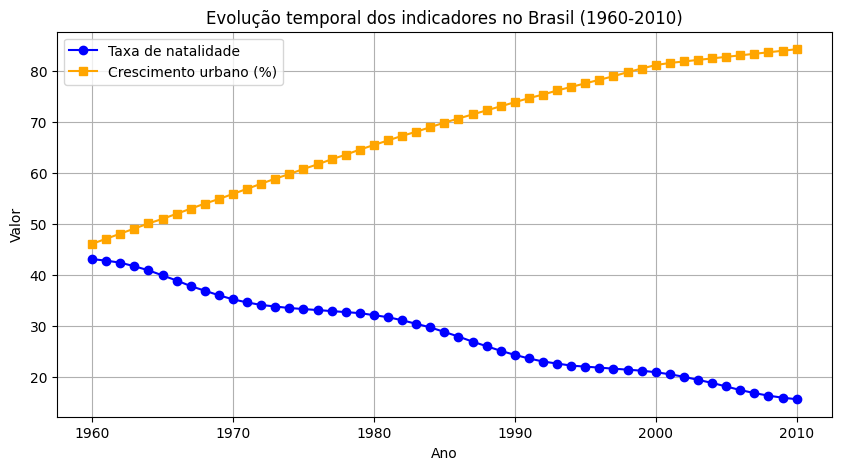

In [65]:
### Gráfico da Evolução temporal ###
plt.figure(figsize=(10,5))
plt.plot(df_1960_2010['year'], df_1960_2010['birth_rate'], label="Taxa de natalidade", color='blue', marker='o')
plt.plot(df_1960_2010['year'], df_1960_2010['urban_growth'], label="Crescimento urbano (%)", color='orange', marker='s')
plt.title("Evolução temporal dos indicadores no Brasil (1960-2010)")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)

Coeficiente angular (slope): -0.672
Intercepto: 74.364
R²: 0.982
P-valor: 0.000
Valor previsto de natalidade em 1985: 27.36
Valor real de natalidade em 1985: 28.80
O valor real de 1985 está acima do valor previsto pela tendência.


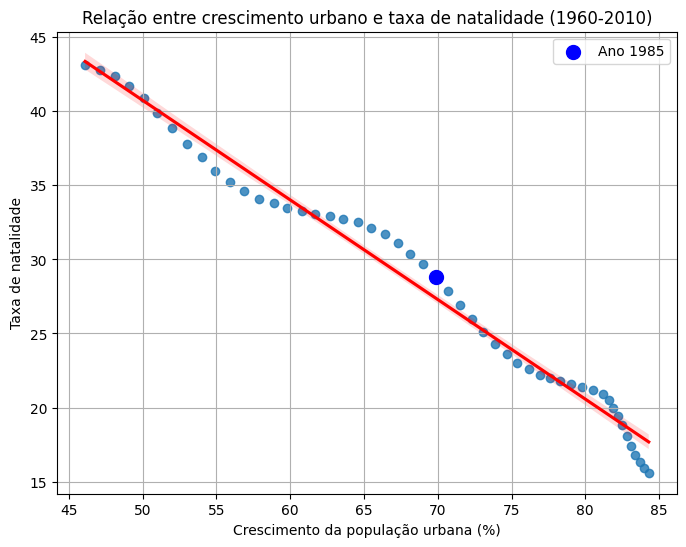

In [66]:
# Regressão linear para a faixa de anos 1960-2010
slope, intercept, r_value, p_val, std_err = linregress(
    df_1960_2010['urban_growth'], df_1960_2010['birth_rate']
)

# Resultados da regressão
print(f"Coeficiente angular (slope): {slope:.3f}")
print(f"Intercepto: {intercept:.3f}")
print(f"R²: {r_value**2:.3f}")
print(f"P-valor: {p_val:.3f}")

# Comparação do valor real de 1985 com o valor previsto pela regressão
valor_previsto = slope * dados_1985['urban_growth'].values[0] + intercept
valor_real = dados_1985['birth_rate'].values[0]

print(f"Valor previsto de natalidade em 1985: {valor_previsto:.2f}")
print(f"Valor real de natalidade em 1985: {valor_real:.2f}")

comparacao = "acima" if valor_real > valor_previsto else "abaixo"
print(f"O valor real de 1985 está {comparacao} do valor previsto pela tendência.")

# Gráfico de dispersão com linha de regressão e destaque do ano 1985
plt.figure(figsize=(8,6))
sns.regplot(data=df_1960_2010, x='urban_growth', y='birth_rate', line_kws={'color':'red'})
plt.scatter(
    dados_1985['urban_growth'], dados_1985['birth_rate'],
    color='blue', s=100, zorder=5, label='Ano 1985'
)
plt.title("Relação entre crescimento urbano e taxa de natalidade (1960-2010)")
plt.xlabel("Crescimento da população urbana (%)")
plt.ylabel("Taxa de natalidade")
plt.legend()
plt.grid(True)

Conclusão

O gráfico de regressão mostra uma pequena margem de erro, ligeiramente acima do valor previsto.

Hipótese 1: Falsa, pois os indicadores seguem direções opostas.

Hipótese 2: Verdadeira, mostrando uma relação inversamente proporcional entre crescimento urbano e taxa de natalidade.

A regressão se mostra relativamente precisa, mas não pode ser aplicada a um único ano, já que é necessário mais de um ponto para calcular a relação. Por isso, 1985 foi destacado apenas em relação à tendência geral da faixa de anos (1960–2010).

Mesmo com pequenas variações individuais, a análise confirma a consistência da relação geral entre os indicadores ao longo do tempo.



